**Get the stemmed data using the same process you did in Week 3.**

In [188]:
import pandas as pd

In [189]:
#Import the movie review data as a data frame and ensure that the data is loaded properly.
movie_review_data = pd.read_csv('/Users/theranmeadows/Desktop/dsc550datamining/week5/data/labeledTrainData.tsv', sep = '\t')

In [190]:
movie_review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [191]:
#How many of each positive and negative reviews are there?
positive_count = movie_review_data['sentiment'].sum()
positive_count

12500

In [192]:
negative_count = len(movie_review_data.index) - positive_count
negative_count

12500

In [193]:
# Use TextBlob to classify each movie review as positive or negative.
# Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.
import textblob

In [276]:
%%capture

text = movie_review_data['review']

blobs = [textblob.TextBlob(row) for row in text]
positive = 0
negative = 0
#for blob in blobs:
 #   print(blob.sentiment.polarity)
    


In [195]:
#Check the accuracy of this model. Is this model better than random guessing?
predicted_sentiment = []
for blob in blobs:
    if blob.sentiment.polarity < 0:
        sentiment = 0
    else:
        sentiment = 1
    predicted_sentiment.append(sentiment)

In [196]:
len(predicted_sentiment)

25000

In [197]:
(movie_review_data['sentiment'] == predicted_sentiment).sum()/ 25000

0.68524

In [198]:
#Convert all text to lowercase letters.
movie_review_data['review'] = movie_review_data['review'].str.lower()
movie_review_data['review']

0        with all this stuff going down at the moment w...
1        \the classic war of the worlds\" by timothy hi...
2        the film starts with a manager (nicholas bell)...
3        it must be assumed that those who praised this...
4        superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    it seems like more consideration has gone into...
24996    i don't believe they made this film. completel...
24997    guy is a loser. can't get girls, needs to buil...
24998    this 30 minute documentary buñuel made in the ...
24999    i saw this movie as a child and it broke my he...
Name: review, Length: 25000, dtype: object

In [199]:
# Remove punctuation and special characters from the text.
test = "...,,fdgsf,,     !!!!:::    ???sdfgsdf"

def remove_punc(review):
    for char in review:
      if char.isalnum():
         review = review.replace('char', ' ')
      elif char == '.':
         review = review.replace('.', ' ')
      elif char == ',':
         review = review.replace(',', ' ')
      elif char == '"':
         review = review.replace('"', ' ')
      elif char == '!':
          review = review.replace('!', ' ')
      elif char == '?':
          review = review.replace('?', ' ')
      elif char == ';':
          review = review.replace(';', ' ')
      elif char == '-':
          review = review.replace('-', ' ')
      elif char == "'":
          review = review.replace("'", ' ')
    return review

In [200]:
# testing remove_punc function
remove_punc(test)

'     fdgsf           :::       sdfgsdf'

In [201]:
import string
import re
reviews = movie_review_data['review']

movie_review_data['review no punc'] = movie_review_data['review'].apply(remove_punc)

In [202]:
movie_review_data.head()

,id,sentiment,review,review no punc
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi...",\the classic war of the worlds\ by timothy hi...
2,7759_3,0,the film starts with a manager (nicholas bell)...,the film starts with a manager (nicholas bell)...
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [203]:
#Remove stop words.
import pandas as pd
import nltk

stop_words = nltk.corpus.stopwords.words('english')

def remove_stop(review):
    words = review.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = " ".join(filtered_words)
    return filtered_text

In [204]:
# testing remove_stop function

text = 'The quick brown fox jumps over the lazy dog.'

remove_stop(text)

'quick brown fox jumps lazy dog.'

In [205]:
movie_review_data['reviews_nostop'] = movie_review_data['review no punc'].apply(remove_stop)

movie_review_data.head()


,id,sentiment,review,review no punc,reviews_nostop
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi...",\the classic war of the worlds\ by timothy hi...,\the classic war worlds\ timothy hines enterta...
2,7759_3,0,the film starts with a manager (nicholas bell)...,the film starts with a manager (nicholas bell)...,film starts manager (nicholas bell) giving wel...
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,must assumed praised film (\the greatest filme...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80 ex...


In [206]:
len(movie_review_data['reviews_nostop'])

25000

In [207]:
#Apply NLTK’s PorterStemmer.
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce



In [208]:
ps = PorterStemmer()
reviews_nostop = movie_review_data['reviews_nostop']
 
stemmed_review_data = [ps.stem(word) for word in reviews_nostop]
len(stemmed_review_data)

25000

In [209]:
movie_review_data['stemmed_dict_data'] = dict(enumerate(stemmed_review_data, 1))

Split this into a training and test set.

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
movie_review_data.shape

(25000, 6)

Split this into a training and test set.

In [212]:

X = movie_review_data['reviews_nostop']
y = movie_review_data['sentiment']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [214]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

Fit and apply the tf-idf vectorization to the training set.

In [215]:
tfidf_vectorizer = TfidfVectorizer()
train_matrix = tfidf_vectorizer.fit_transform(X_train)
train_matrix.shape

(20000, 68403)

Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [217]:
# Because it would cause the test data to mix with the model
test_matrix = tfidf_vectorizer.transform(X_test)
test_matrix.shape

(5000, 68403)

Train a logistic regression using the training data.

In [132]:
from sklearn.linear_model import LogisticRegression

In [218]:
model = LogisticRegression()

In [219]:
y_test_pred = model.fit(train_matrix, y_train).predict(test_matrix)

Find the model accuracy on test set.

In [220]:
from sklearn.metrics import accuracy_score

In [221]:
accuracy_score(y_test, y_test_pred)

0.8956

Create a confusion matrix for the test set predictions.

In [222]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [225]:
matrix = confusion_matrix(y_test, y_test_pred)
matrix

array([[2215,  288],
       [ 234, 2263]])

Get the precision, recall, and F1-score for the test set predictions.

In [271]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy

In [253]:
# Calculate Precision
p_score = precision_score(y_test, y_test_pred)

# Calculate Recall
r_score = recall_score(y_test, y_test_pred)

# Calculate F1-score
f1_score = f1_score(y_test, y_test_pred)

# Print results
print("Precision:",p_score)
print("Recall:",r_score)
print("F1-score:",f1_score)

Precision: 0.8871030968247746
Recall: 0.9062875450540648
F1-score: 0.8965927099841522


Precision: 0.8871030968247746<br>
Recall: 0.9062875450540648<br>
F1-score: 0.8965927099841522<br>

Create a ROC curve for the test set.

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score

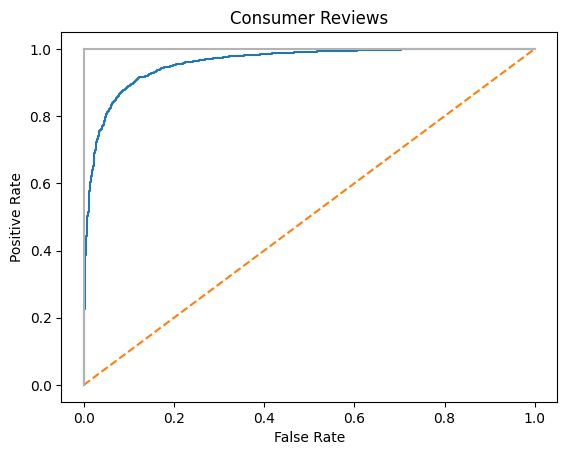

In [258]:
target = model.predict_proba(test_matrix)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target)

# Plot ROC curve

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1] , c=".7")
plt.title("ROC Curve")
plt.ylabel("Positive Rate")
plt.xlabel("False Rate")
plt.show()

Pick another classification model you learned about this week and repeat steps (5) – (9).

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:

rand_forest = RandomForestClassifier(random_state=0, n_jobs=-1)
rand_forest_pred = rand_forest.fit(train_matrix, y_train).predict(test_matrix)

In [261]:
accuracy_score(y_test, rand_forest_pred)

0.8478

In [264]:
rand_forest_matrix = confusion_matrix(y_test, rand_forest_pred)
rand_forest_matrix

array([[2151,  352],
       [ 409, 2088]])

In [272]:

rand_forest_prec = precision_score(y_test, rand_forest_pred)
rand_forest_rec = recall_score(y_test, rand_forest_pred)
rand_forest_f1 = f1_score(y_test, rand_forest_pred)

print("Precision:",rand_forest_prec)
print("Recall:",rand_forest_rec)
print("F1-score:",rand_forest_f1)

Precision: 0.8557377049180328
Recall: 0.8362034441329596
F1-score: 0.8458578083856593


Precision: 0.8557377049180328
Recall: 0.8362034441329596
F1-score: 0.8458578083856593

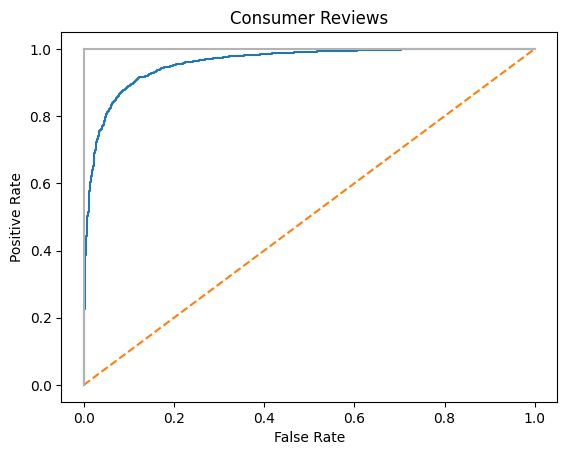

In [273]:
rand_forest_target = model.predict_proba(test_matrix)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rand_forest_target)

# Plot ROC curve

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1] , c=".7")
plt.title("ROC Curve")
plt.ylabel("Positive Rate")
plt.xlabel("False Rate")
plt.show()